# Desafio 1

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import factor_analyzer as factor
import missingno as magn

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_csv('bfi.csv')
df.head(5)

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


# Desafio 2

In [2]:
df = df.drop(columns='Unnamed: 0')

<AxesSubplot:>

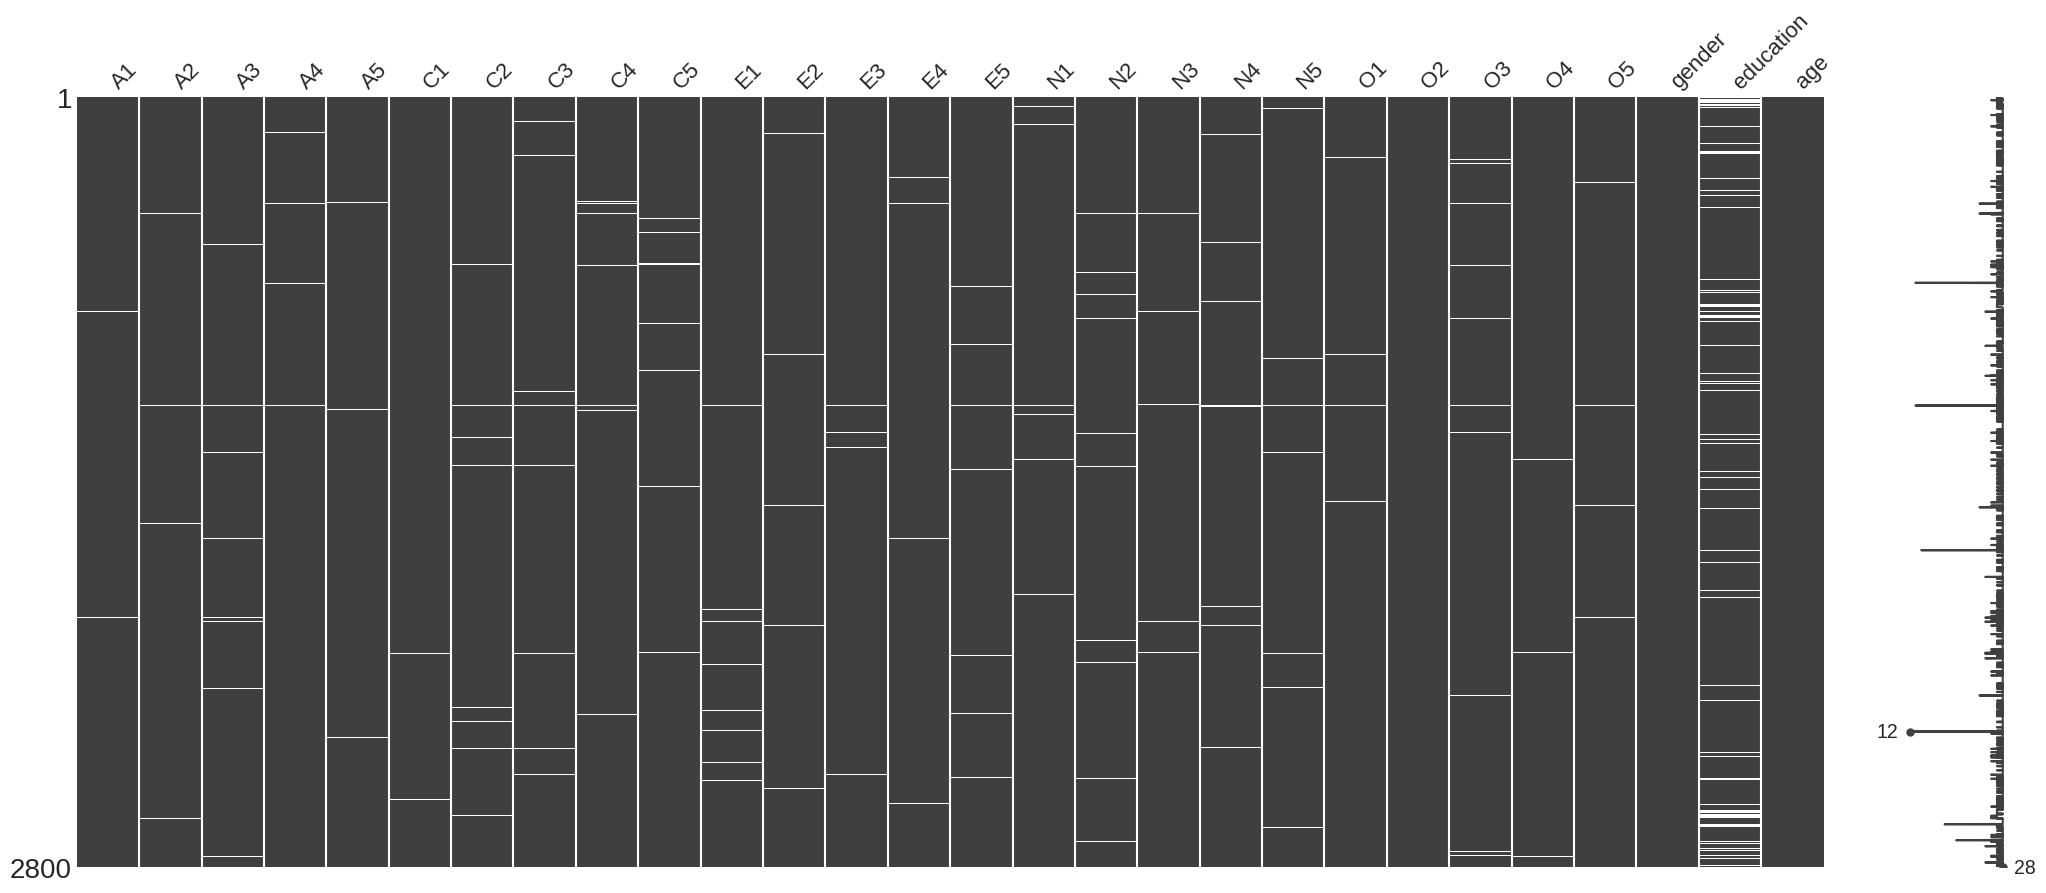

In [3]:
magn.matrix(df)
# Visualmente se puede ver que la columna education tiene la mayor cantidad de valores faltantes

In [4]:
def conteo_nan(df):
    number_nan_count = df.isna().sum()
    percentage_nan_count = round(number_nan_count / sum(number_nan_count), 2)

    resumen_cantidad_nan = pd.DataFrame(
        {'Cantidad Nan': number_nan_count, 'Porcentaje NaN': percentage_nan_count},
        index=df.columns)
    
    return resumen_cantidad_nan

conteo_nan(df).sort_values(by='Porcentaje NaN', ascending=False)

# Efectivamente, education es la columna con una mayor cantidad de valores faltantes
# Luego lo sigue N4, que es la oracion "Usualmente me siento melancolico"

,Cantidad Nan,Porcentaje NaN
education,223,0.31
N4,36,0.05
A3,26,0.04
A2,27,0.04
C4,26,0.04
N5,29,0.04
O3,28,0.04
E3,25,0.03
O1,22,0.03
N2,21,0.03


In [5]:
df_sin_na = df.dropna()

# Desafio 3

In [6]:
numeros_pregunta = ['1', '2', '3', '4', '5']
columnas_preguntas = [columna for columna in df_sin_na.columns if columna[-1] in numeros_pregunta]
preguntas_df = df_sin_na[columnas_preguntas]

In [41]:
medias_preguntas = preguntas_df.mean()
respuestas_rankeadas = medias_preguntas.sort_values()

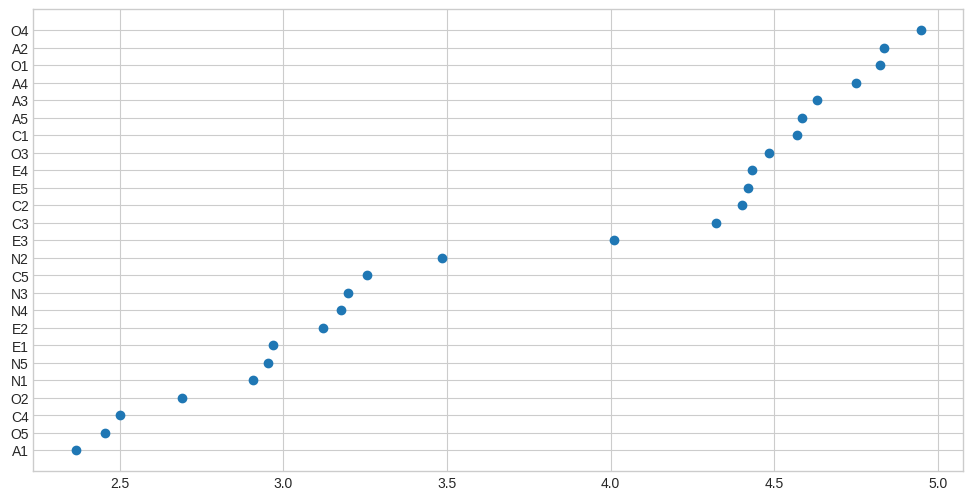

In [42]:
plt.plot(respuestas_rankeadas.array, respuestas_rankeadas.index, 'o')
# O4 (Dedico tiempo a la reflexion de cosas) fue la pregunta que tuvo la media mayor
# A2 (Me preocupo delbienestar de otros) fue la segunda pregunta con la mayor media

<AxesSubplot:>

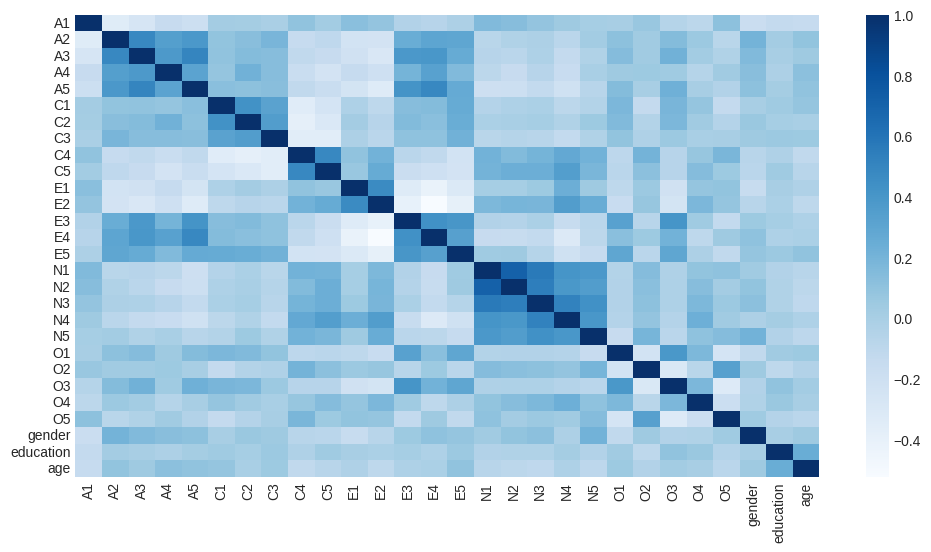

In [47]:
correlaciones = df_sin_na.corr()
sns.heatmap(correlaciones, cmap='Blues')

# De forma general se puede ver una alta correlacion entre las preguntas 
# N1 a N5 (Preguntas de Neuroticismo).

# Se puede ver una correlacion moderada entre las preguntas C4 a E2 (Escrupulosidad y Extroversion)
# con las preguntas N1 a N5 (Neuroticismo)

# Tambien se ve una correlacion moderada - alta entre las preguntas A2 a C3 (Amabildad y creo que
# un poco de Responsabilidad)y las preguntas E3 a E5 (Extroversoin)